<a href="https://colab.research.google.com/github/hem-githu/python/blob/main/DA_AG_003_Assignment_Hem_Pandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA-AG-003_Assignment_Hem Pandey
# Practical Python – Error Handling, Logging, and Data Manipulation Assignment

1. What is the difference between multithreading and multiprocessing?

Ans. Multithreading runs multiple threads within a single process, sharing the same memory space, while Multiprocessing runs multiple independent processes, each with its own memory, often across multiple CPU cores.

***Multithreading***

- Definition: Splits a single process into multiple threads.
- Memory: All threads share the same memory space.
- Overhead: Lightweight, faster to create and switch between.
- Best For: I/O-bound tasks (e.g., web scraping, file I/O, network requests).
- Python Limitation: The Global Interpreter Lock (GIL) prevents true parallel execution of threads in CPU-heavy tasks.

***Multiprocessing***
- Definition: Runs multiple processes, often on different CPU cores.
- Memory: Each process has its own memory space (no sharing by default).
- Overhead: Heavier, slower to spawn, requires more system resources.
- Best For: CPU-bound tasks (e.g., simulations, data crunching, ML training).
- Python Advantage: Bypasses the GIL, enabling true parallelism.

2.

Ans. The main challenges in Python’s memory management are memory leaks, fragmentation, garbage collection overhead, reference cycles, and high memory usage from large objects or inefficient data structures.

***Key Challenges in Python Memory Management***
1. Memory Leaks
- Occur when objects are no longer needed but still referenced somewhere in the program.
- Common causes:
- Global variables holding references unintentionally.
- C extensions that don’t release memory properly.
- Long-lived caches or data structures that grow unchecked.
2. Reference Cycles
- Python uses reference counting as its primary memory management technique.
- If two or more objects reference each other, their reference count never drops to zero.
3. Memory Fragmentation
- Python’s internal allocator (pymalloc) manages small objects efficiently, but:
- Long-running programs with frequent allocations/deallocations can fragment memory.
- This leads to wasted space and reduced performance
4. Large Object Handling
- Python objects carry metadata (type, reference count, etc.), making them heavier than raw C structures.
- For large datasets, this overhead becomes significant.
- Mitigation: Use specialized libraries like NumPy (compact arrays) or Pandas (optimized tabular storage).





In [1]:
#3.Write a Python program that logs an error message to a log file when a division by zero exception occurs.?
import logging

# Configure logging
logging.basicConfig(
    filename="error_log.log",       # Log file name
    level=logging.ERROR,            # Log only ERROR and above
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def safe_divide(a, b):
    try:
        return a / b
    except ZeroDivisionError as e:
        logging.error("Division by zero attempted: a=%s, b=%s", a, b)
        print("Error: Division by zero. Check error_log.log for details.")
        return None

# Example usage
if __name__ == "__main__":
    result = safe_divide(10, 0)   # This will trigger the exception
    print("Result:", result)


ERROR:root:Division by zero attempted: a=10, b=0


Error: Division by zero. Check error_log.log for details.
Result: None


In [10]:
#4.Write a Python program that reads from one file and writes its content to another file.?
def copy_file(source_file, destination_file):
    try:
        # Open the source file in read mode and destination in write mode
        with open(source_file, 'r') as src, open(destination_file, 'w') as dest:
            # Read content from source and write to destination
            content = src.read()
            dest.write(content)
            print("File content:\n")
            print(content)

        print(f"Contents of '{source_file}' copied successfully to '{destination_file}'.")
    except FileNotFoundError:
        print(f"Error: The file '{source_file}' does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
if __name__ == "__main__":
    copy_file("/input.txt", "output.txt")

!ls -l #showing all files

File content:

Learning Search Engine Optimization(SEO) takes time. But one thing is absolutely true: You need backlinks to succeed online. If your website wants to rank high, other reliable sites must link to you. These links are like digital votes of confidence. Learning about all the best Types of Backlinks is the first step to high rankings.

Contents of '/input.txt' copied successfully to 'output.txt'.
total 12
-rw-r--r-- 1 root root   32 Oct 19 04:55 input
-rw-r--r-- 1 root root  333 Oct 19 05:10 output.txt
drwxr-xr-x 1 root root 4096 Oct 16 13:41 sample_data


In [11]:
#5. Write a program that handles both IndexError and KeyError using a try-except block.?

def handle_errors():
    my_list = [10, 20, 30]
    my_dict = {"a": 1, "b": 2}

    try:
        # This will raise IndexError
        print("Accessing list element at index 5:", my_list[5])

        # This will raise KeyError
        print("Accessing dictionary key 'z':", my_dict["z"])

    except IndexError as ie:
        print("IndexError occurred:", ie)

    except KeyError as ke:
        print("KeyError occurred:", ke)

    except Exception as e:
        # Catch any other unexpected errors
        print("An unexpected error occurred:", e)

# Example usage
if __name__ == "__main__":
    handle_errors()

IndexError occurred: list index out of range


6. What are the differences between NumPy arrays and Python lists?

Ans.***Key Differences Between NumPy Arrays and Python Lists***
1. Data Type
- Python Lists: Can hold elements of different data types (e.g., integers, strings, floats in the same list).
- NumPy Arrays: Require elements to be of the same data type (homogeneous), which allows for efficient memory storage and vectorized operations.
2. Performance
- Lists: Operations are slower because they are implemented in pure Python and must handle type flexibility.
- NumPy Arrays: Much faster for numerical tasks since they use optimized C-based implementations and contiguous memory blocks.
3. Memory Usage
- Lists: Store references to objects, leading to higher memory overhead.
- NumPy Arrays: Store raw values in contiguous memory, making them more memory-efficient, especially for large datasets.
4. Functionality
- Lists: Support general-purpose operations like appending, nesting, and holding mixed objects.
- NumPy Arrays: Provide powerful mathematical operations (matrix multiplication, broadcasting, linear algebra, statistical functions) that are not natively available with lists

5. Dimensionality
- Lists: Can be nested to mimic multi-dimensional structures, but operations become cumbersome and inconsistent.
- NumPy Arrays: Naturally support multi-dimensional arrays (1D, 2D, nD) with consistent indexing and slicing.
6. Use Cases
- Lists: Best for small collections, mixed data, or when flexibility is more important than speed.
- NumPy Arrays: Ideal for scientific computing, data analysis, machine learning, and any task involving large-scale numerical data.


7. Explain the difference between apply() and map() in Pandas.?

Ans. In Pandas, map() is used only on a Series to transform each element individually, while apply() works on both Series and DataFrames, allowing you to apply functions across rows, columns, or entire Series. Detailed explaination is:
1. Scope of Use:
***map()***
- Works only on Pandas Series (a single column).
- Applies a function element-wise to each value in that Series.

***apply()***
- Works on both Series and DataFrames.
- On a Series: behaves similarly to map(), applying a function element-wise.
- On a DataFrame: can apply a function across rows (axis=1) or columns (axis=0).

2. Function Flexibility
***map()***
- Accepts a function, dictionary, or Series for mapping values.
- Example: replacing values or applying a simple transformation.

***apply()***
- Accepts any function, including custom ones that operate on entire rows or columns.
- More flexible for complex operations

3. Performance
***map()*** is slightly faster for element-wise operations on a Series because it’s specialized.
***apply()*** is more general and powerful but may be slower for simple element-wise tasks.













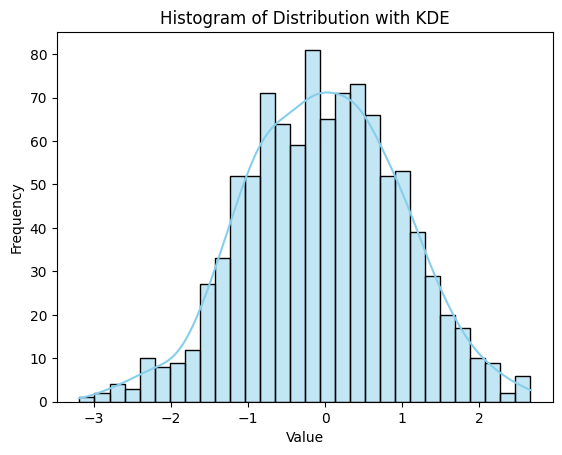

In [12]:
#8. Create a histogram using Seaborn to visualize a distribution.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data (normal distribution)
data = np.random.randn(1000)

# Create a histogram with Seaborn
sns.histplot(data, bins=30, kde=True, color="skyblue")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Distribution with KDE")

# Show the plot
plt.show()

In [13]:
#9. Use Pandas to load a CSV file and display its first 5 rows.

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("/solar dat.csv")   # replace with your actual file name or path

# Display the first 5 rows
print(df.head())

  Sector Installed RE Capacity (Capacities in MW)  \
0                                    Solar Power*   
1                                      Wind Power   
2                  Biomass (Bagasse) Cogeneration   
3                Biomass(non-bagasse)Cogeneration   
4                                 Waste to Energy   

  FY 2025-26 Achievements during the Month of July, 2025  \
0                                             2,769        
1                                               465        
2                                               -          
3                                               -          
4                                               -          

  FY 2025-26 Achievements (1st April 2025-31st July 2025)  \
0                                            13,370         
1                                             2,102         
2                                               -           
3                                               -           
4              

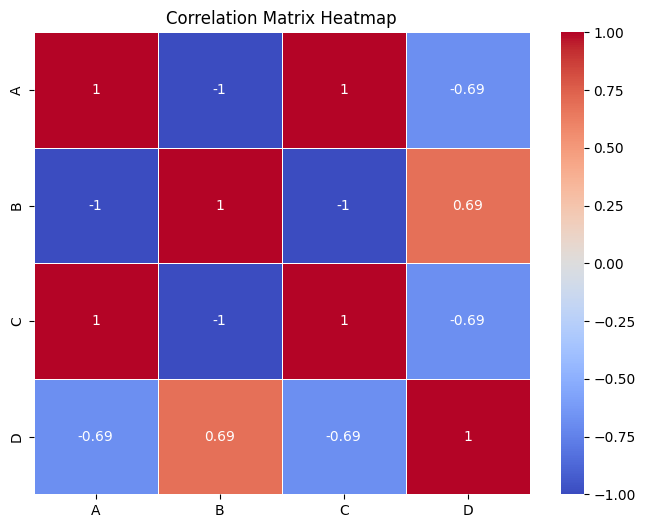

In [15]:
#10.  Calculate the correlation matrix using Seaborn and visualize it with a heatmap

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "A": [1, 2, 3, 4, 5],
    "B": [5, 4, 3, 2, 1],
    "C": [2, 3, 4, 5, 6],
    "D": [5, 3, 6, 2, 1]
}

df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()
